In [1]:
import pandas as pd
import numpy as np

## Pandas 將 None 與 float('NaN') 視為 遺失值

In [2]:
float(3)

3.0

In [3]:
float('3.4')

3.4

In [4]:
float('NaN')

nan

In [5]:
dfmm=pd.DataFrame( [ {'key':float('NaN'), 'data':8, 'price':80} , 
                     {'key':'B', 'data':7, 'price':50} ,
                     {'key':'C', 'data':12, 'price':None} ,                       
                     {'key':'A', 'data':9, 'price':80} ,
                     {'key':'B', 'data':5, 'price':float('NaN')},
                     {'key':4, 'data':6, 'price':70},
                     {'key':'12房', 'data':7, 'price':70},
                     {'key':'3房', 'data':9, 'price':90}
                   ]  
                 )
print(dfmm)

   data  key  price
0     8  NaN   80.0
1     7    B   50.0
2    12    C    NaN
3     9    A   80.0
4     5    B    NaN
5     6    4   70.0
6     7  12房   70.0
7     9   3房   90.0


## 有看到 遺失值嗎 ?

In [6]:
dfmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
data     8 non-null int64
key      7 non-null object
price    6 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


## 複習　df.loc

In [7]:
dfmm.loc[6,'key']

'12房'

In [8]:
dfmm.loc[6,'key'][0:2]

'12'

In [9]:
dfmm.loc[6,'key'][0:-1]

'12'

In [10]:
int(dfmm.loc[6,'key'][0:-1])

12

In [11]:
dfmm.loc[7,'key'][0:-1]

'3'

In [12]:
int(dfmm.loc[7,'key'][0:-1])

3

## 複習 list 如何加一element 

In [14]:
t=[] # t is an empty list , 空list
t.append(int(dfmm.loc[6,'key'][0:-1]))
print(t)
t.append(int(dfmm.loc[7,'key'][0:-1]))
print(t)

[12]
[12, 3]


In [15]:
for i in range(6):
    t.append(10)
print(t)

[12, 3, 10, 10, 10, 10, 10, 10]


## 加一新欄

In [16]:
dfmm['Bless_FGU_students']=t

In [17]:
dfmm

,data,key,price,Bless_FGU_students
0,8,NaN,80.0,12
1,7,B,50.0,3
2,12,C,NaN,10
3,9,A,80.0,10
4,5,B,NaN,10
5,6,4,70.0,10
6,7,12房,70.0,10
7,9,3房,90.0,10


## 用 df.isnull() 檢查遺失值   發現missing value 則 True

In [18]:
dfmm.isnull()

,data,key,price,Bless_FGU_students
0,False,True,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False


In [19]:
dfmm

,data,key,price,Bless_FGU_students
0,8,NaN,80.0,12
1,7,B,50.0,3
2,12,C,NaN,10
3,9,A,80.0,10
4,5,B,NaN,10
5,6,4,70.0,10
6,7,12房,70.0,10
7,9,3房,90.0,10


## 用　dropna 刪除遺失值

In [20]:
dfmm=dfmm.dropna()
print(dfmm) 

   data  key  price  Bless_FGU_students
1     7    B   50.0                   3
3     9    A   80.0                  10
5     6    4   70.0                  10
6     7  12房   70.0                  10
7     9   3房   90.0                  10


## 調整 index 

In [21]:
dfmm=dfmm.reset_index(drop=True)

In [22]:
dfmm

,data,key,price,Bless_FGU_students
0,7,B,50.0,3
1,9,A,80.0,10
2,6,4,70.0,10
3,7,12房,70.0,10
4,9,3房,90.0,10


In [23]:
dfmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
data                  5 non-null int64
key                   5 non-null object
price                 5 non-null float64
Bless_FGU_students    5 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 240.0+ bytes


## 用 numpy 產生 高斯分布random variable

In [24]:
radnum=np.random.normal(loc=0, scale=0.4, size=5)
print(radnum)

[ 0.05847212 -0.51289545  0.17330418  0.2287909  -0.17975467]


## 產生 新的欄位 new=data + random 
## note: data 與 new 有高度正相關喔 !!  

In [25]:
dfmm['new']=dfmm['data']+radnum

In [26]:
dfmm['new']

0    7.058472
1    8.487105
2    6.173304
3    7.228791
4    8.820245
Name: new, dtype: float64

In [27]:
dfmm

,data,key,price,Bless_FGU_students,new
0,7,B,50.0,3,7.058472
1,9,A,80.0,10,8.487105
2,6,4,70.0,10,6.173304
3,7,12房,70.0,10,7.228791
4,9,3房,90.0,10,8.820245


## 用 numpy 算  sum , mean , std 

In [28]:
np.sum(dfmm['new'])

37.76791708506131

In [29]:
np.std(dfmm['new'])

0.9727990796580626

In [30]:
new_mean=np.mean(dfmm['new'])
print(new_mean)

7.553583417012263


In [31]:
data_mean=np.mean(dfmm['data'])
print(data_mean)

7.6


In [32]:
dfmm.mean()

data                   7.600000
price                 72.000000
Bless_FGU_students     8.600000
new                    7.553583
dtype: float64

## 用 pandas 的 corr() : Return correlation coefficients

In [33]:
dfmm.corr()

,data,price,Bless_FGU_students,new
data,1.000000,0.678401,0.250000,0.990380
price,0.678401,1.000000,0.829156,0.690716
Bless_FGU_students,0.250000,0.829156,1.000000,0.254478
new,0.990380,0.690716,0.254478,1.000000


## 用 numpy 的 corrcoef : Return correlation coefficients.

In [34]:
np.corrcoef(dfmm['new'], dfmm['data'])

array([[1.        , 0.99038014],
       [0.99038014, 1.        ]])

In [35]:
np.corrcoef(dfmm['price'], dfmm['data'])

array([[1.        , 0.67840053],
       [0.67840053, 1.        ]])

## 用 matplotlib 視覺化作圖

In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['font.family']='DFKai-SB'

Text(0,0.5,'data')

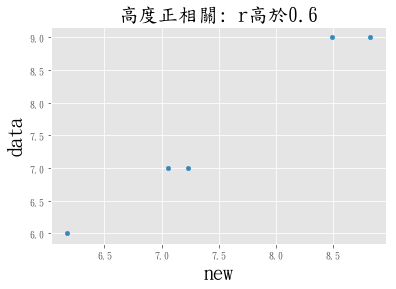

In [37]:
dfmm.plot(kind='scatter',x='new'  ,y='data' , figsize=(6,4))
plt.title('高度正相關: r高於0.6',color='black',size=20)
plt.xlabel('new',size=20,color='black')
plt.ylabel('data',color='black',size=20)

Text(0,0.5,'data')

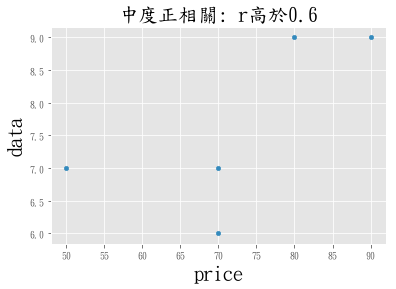

In [38]:
dfmm.plot(kind='scatter',x='price'  ,y='data' , figsize=(6,4))
plt.title('中度正相關: r高於0.6',color='black',size=20)
plt.xlabel('price',size=20,color='black')
plt.ylabel('data',color='black',size=20)